In [2]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
#import qgrid as interactive table 
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


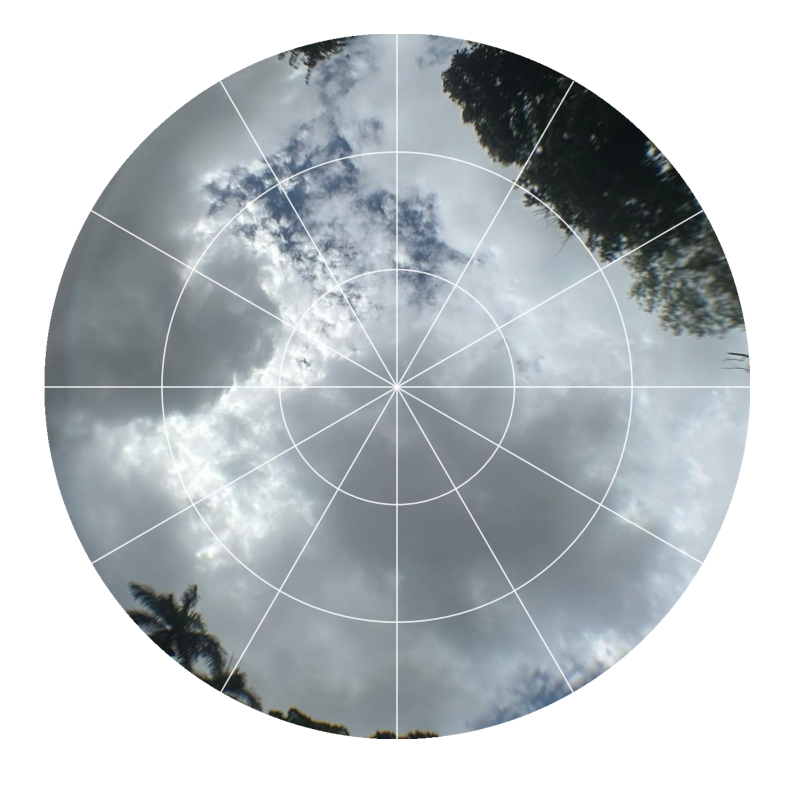

In [3]:

from matplotlib.patches import Circle
from PIL import Image, ImageDraw

# loading+squaring image
img = Image.open("/Users/coraldelmar/Downloads/riel.jpeg").convert("RGB")
img_array = np.array(img)
h, w = img_array.shape[:2]
min_dim = min(h, w)

# cropping to center sqr
img_square = img_array[
    (h - min_dim) // 2 : (h + min_dim) // 2,
    (w - min_dim) // 2 : (w + min_dim) // 2
]

#masking image
radius = min_dim // 2
center = (radius, radius)
Y, X = np.ogrid[:min_dim, :min_dim]
dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
alpha_mask = (dist_from_center <= radius).astype(np.uint8) * 255

img_rgba = np.dstack((img_square, alpha_mask))

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgba)
ax.axis("off")

# grid
# elevation
for elev in [30, 60, 90]:
    r = radius * (1 - elev / 90)
    circ = Circle(center, r, edgecolor='white', facecolor='none',
                  lw=1.2, alpha=0.8)
    ax.add_patch(circ)

# Azimuth lines-- i set for every 30 degree but can be changed
for az in range(0, 360, 30):
    theta = np.radians(az)
    x = center[0] + radius * np.sin(theta)
    y = center[1] - radius * np.cos(theta)
    ax.plot([center[0], x], [center[1], y], color='white', lw=1.2, alpha=0.8)
    ax.text(
        center[0] + 1.05 * radius * np.sin(theta),
        center[1] - 1.05 * radius * np.cos(theta),
        f"{az}°",
        color='white',
        fontsize=10,
        ha='center',
        va='center'
    )
plt.tight_layout()
plt.show()

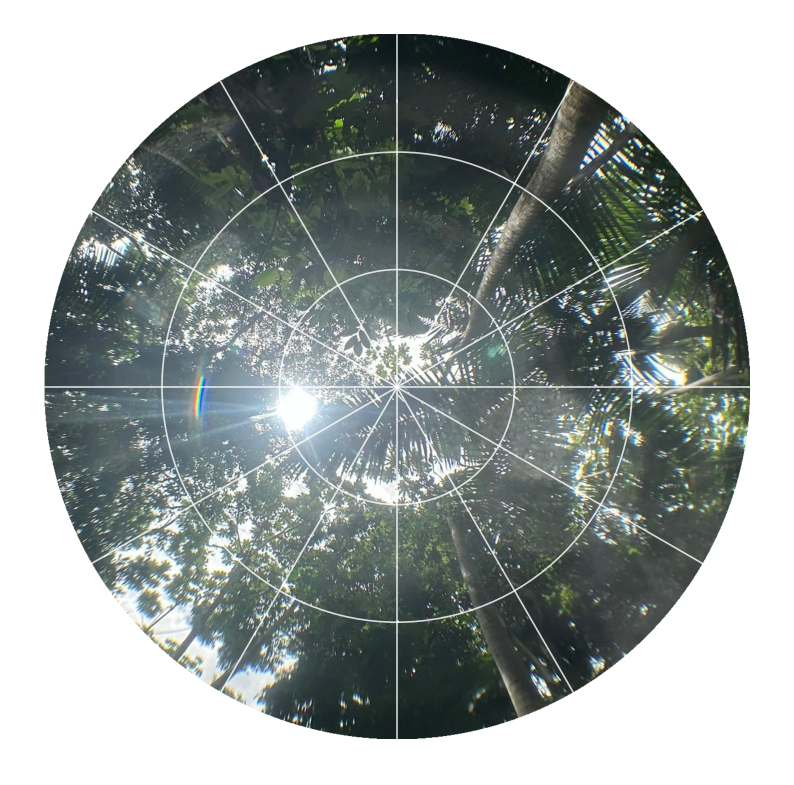

In [4]:
# loading+squaring image
img = Image.open("/Users/coraldelmar/Downloads/gutter.jpeg").convert("RGB")
img_array = np.array(img)
h, w = img_array.shape[:2]
min_dim = min(h, w)

# cropping to center sqr
img_square = img_array[
    (h - min_dim) // 2 : (h + min_dim) // 2,
    (w - min_dim) // 2 : (w + min_dim) // 2
]

#masking image
radius = min_dim // 2
center = (radius, radius)
Y, X = np.ogrid[:min_dim, :min_dim]
dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
alpha_mask = (dist_from_center <= radius).astype(np.uint8) * 255

img_rgba = np.dstack((img_square, alpha_mask))

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgba)
ax.axis("off")

# grid
# elevation
for elev in [30, 60, 90]:
    r = radius * (1 - elev / 90)
    circ = Circle(center, r, edgecolor='white', facecolor='none',
                  lw=1.2, alpha=0.8)
    ax.add_patch(circ)

# Azimuth lines-- i set for every 30 degree but can be changed
for az in range(0, 360, 30):
    theta = np.radians(az)
    x = center[0] + radius * np.sin(theta)
    y = center[1] - radius * np.cos(theta)
    ax.plot([center[0], x], [center[1], y], color='white', lw=1.2, alpha=0.8)
    ax.text(
        center[0] + 1.05 * radius * np.sin(theta),
        center[1] - 1.05 * radius * np.cos(theta),
        f"{az}°",
        color='white',
        fontsize=10,
        ha='center',
        va='center'
    )
plt.tight_layout()
plt.show()

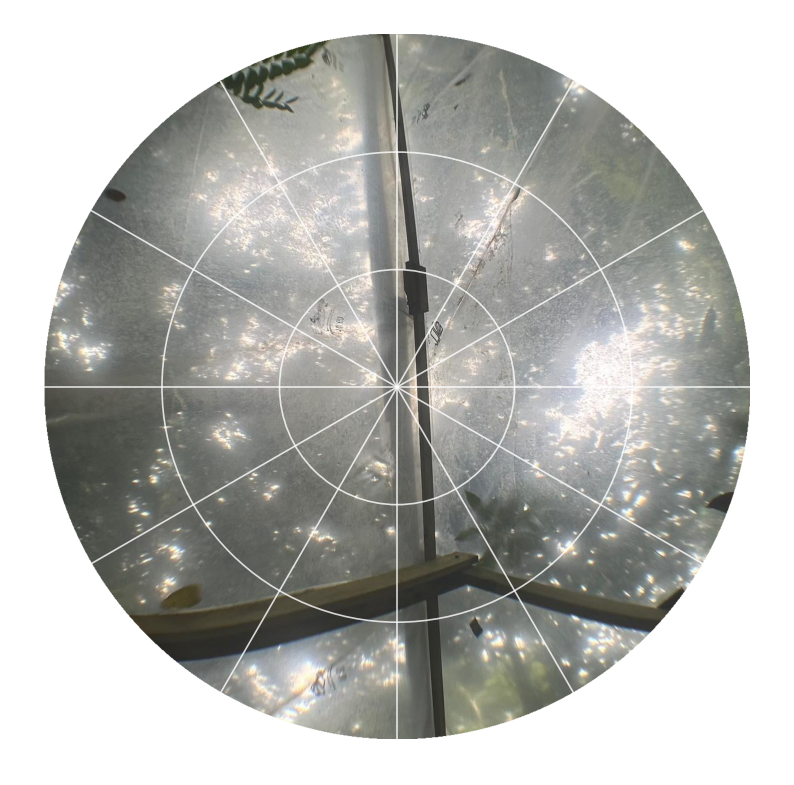

In [5]:
# loading+squaring image
img = Image.open("/Users/coraldelmar/Downloads/sequia.jpeg").convert("RGB")
img_array = np.array(img)
h, w = img_array.shape[:2]
min_dim = min(h, w)

# cropping to center sqr
img_square = img_array[
    (h - min_dim) // 2 : (h + min_dim) // 2,
    (w - min_dim) // 2 : (w + min_dim) // 2
]

#masking image
radius = min_dim // 2
center = (radius, radius)
Y, X = np.ogrid[:min_dim, :min_dim]
dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
alpha_mask = (dist_from_center <= radius).astype(np.uint8) * 255

img_rgba = np.dstack((img_square, alpha_mask))

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgba)
ax.axis("off")

# grid
# elevation
for elev in [30, 60, 90]:
    r = radius * (1 - elev / 90)
    circ = Circle(center, r, edgecolor='white', facecolor='none',
                  lw=1.2, alpha=0.8)
    ax.add_patch(circ)

# Azimuth lines-- i set for every 30 degree but can be changed
for az in range(0, 360, 30):
    theta = np.radians(az)
    x = center[0] + radius * np.sin(theta)
    y = center[1] - radius * np.cos(theta)
    ax.plot([center[0], x], [center[1], y], color='white', lw=1.2, alpha=0.8)
    ax.text(
        center[0] + 1.05 * radius * np.sin(theta),
        center[1] - 1.05 * radius * np.cos(theta),
        f"{az}°",
        color='white',
        fontsize=10,
        ha='center',
        va='center'
    )
plt.tight_layout()
plt.show()

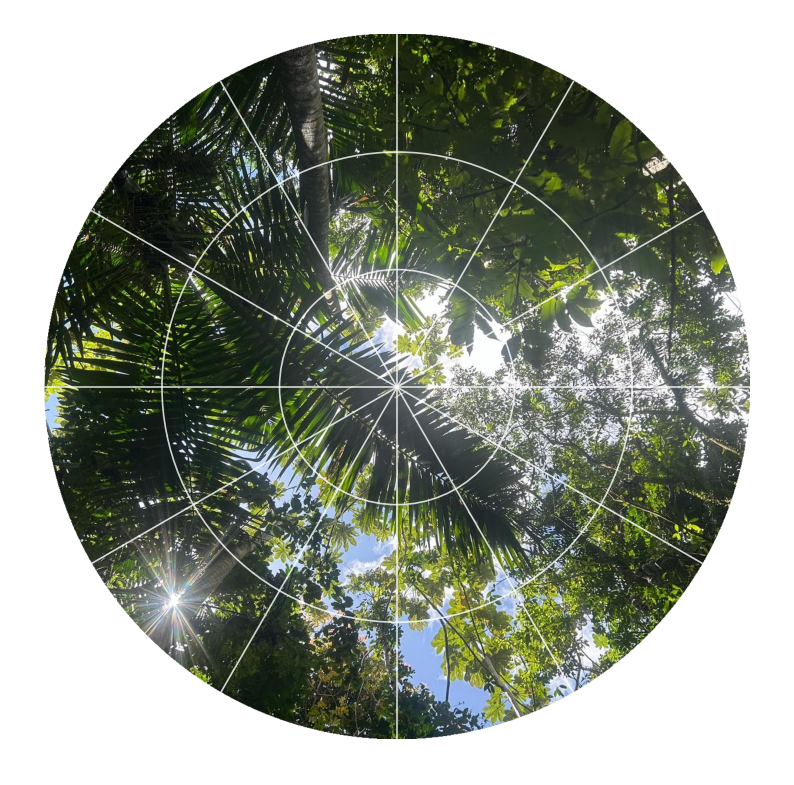

In [6]:
# loading+squaring image
img = Image.open("/Users/coraldelmar/Downloads/gutter2.jpeg").convert("RGB")
img_array = np.array(img)
h, w = img_array.shape[:2]
min_dim = min(h, w)

# cropping to center sqr
img_square = img_array[
    (h - min_dim) // 2 : (h + min_dim) // 2,
    (w - min_dim) // 2 : (w + min_dim) // 2
]

#masking image
radius = min_dim // 2
center = (radius, radius)
Y, X = np.ogrid[:min_dim, :min_dim]
dist_from_center = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
alpha_mask = (dist_from_center <= radius).astype(np.uint8) * 255

img_rgba = np.dstack((img_square, alpha_mask))

# plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_rgba)
ax.axis("off")

# grid
# elevation
for elev in [30, 60, 90]:
    r = radius * (1 - elev / 90)
    circ = Circle(center, r, edgecolor='white', facecolor='none',
                  lw=1.2, alpha=0.8)
    ax.add_patch(circ)

# Azimuth lines-- i set for every 30 degree but can be changed
for az in range(0, 360, 30):
    theta = np.radians(az)
    x = center[0] + radius * np.sin(theta)
    y = center[1] - radius * np.cos(theta)
    ax.plot([center[0], x], [center[1], y], color='white', lw=1.2, alpha=0.8)
    ax.text(
        center[0] + 1.05 * radius * np.sin(theta),
        center[1] - 1.05 * radius * np.cos(theta),
        f"{az}°",
        color='white',
        fontsize=10,
        ha='center',
        va='center'
    )
plt.tight_layout()
plt.show()